<a href="https://colab.research.google.com/github/busung/data-analysis-by-EDA/blob/main/2_2020%EB%85%84_Kaggle_%EC%84%A4%EB%AC%B8%EC%A1%B0%EC%82%AC_%EA%B2%B0%EA%B3%BC_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

#시각화 관련
import seaborn as sns
import matplotlib.pyplot as plt

#시각화 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")#그래프를 뚜렷하게

plt.style.use("seaborn-whitegrid")#그래프 테마 통일

In [2]:
raw=pd.read_csv("kaggle_survey_2020_responses.csv",low_memory=False)
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9072 entries, 0 to 9071
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 24.6+ MB


In [3]:
raw.head()
#질문이 0번재 행에 들어가 있는 것을 확인 가능함
#Q7이 약간 특이함

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,Which of the following hosted notebook product...,...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,Which specific automated machine learning tool.

#데이터 전처리

In [4]:
#설문
question = raw.iloc[0]
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [5]:
#답변
answer=raw.drop([0])
answer.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,Visual Studio Code (VSCode),NaN,Spyder,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SAP Analytics Cloud,NaN,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,NaN,NaN,Automated hyperparameter tuning (e.g. hyperopt...,Automation of full ML pipelines (e.g. Google C...,NaN,NaN,Google Cloud AutoML,NaN,Databricks AutoML,NaN,NaN,Auto-Keras,Auto-Sklearn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN,R,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,Notepad++,Sublime Text,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(answer.info(),question.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9071 entries, 1 to 9071
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 24.6+ MB
None (355,)


#데이터 살펴보기(Q1~Q6)

In [7]:
question["Q1"]

'What is your age (# years)?'

In [8]:
#각 값에 대한 도수 계산
answer["Q1"].value_counts()

25-29    1854
22-24    1750
18-21    1577
30-34    1272
35-39     866
40-44     612
45-49     440
50-54     308
55-59     186
60-69     174
70+        32
Name: Q1, dtype: int64

In [9]:
#도수 계산 후 인덱스로
answer["Q1"].value_counts().sort_index()

18-21    1577
22-24    1750
25-29    1854
30-34    1272
35-39     866
40-44     612
45-49     440
50-54     308
55-59     186
60-69     174
70+        32
Name: Q1, dtype: int64

##Q1 시각화

Text(0.5, 1.0, 'What is your age (# years)?')

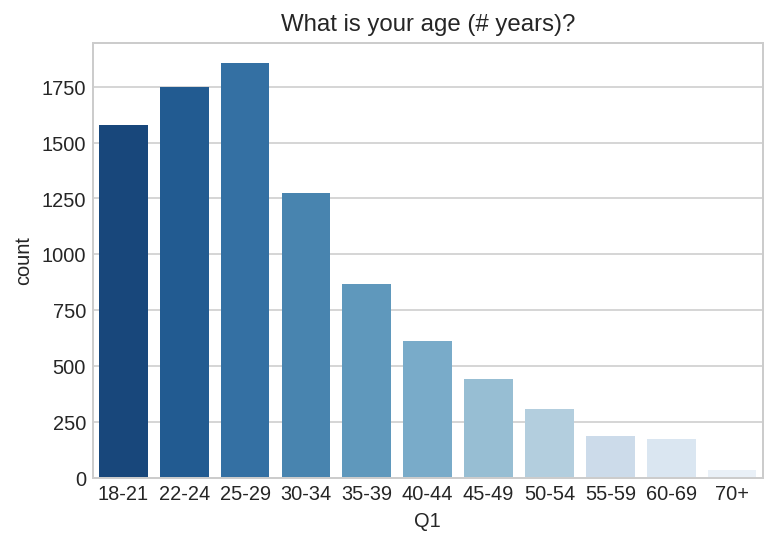

In [10]:
#시각화
answer.sort_values("Q1")
sns.countplot(data=answer.sort_values("Q1"),x="Q1",palette="Blues_r").set_title(question["Q1"])#x축을 기준으로 그래프를 그릴 때

##Q2 시각화

In [11]:
print(answer["Q2"].values)
print(answer["Q2"].value_counts())
print(answer["Q2"].index)

['Man' 'Man' 'Man' ... 'Man' 'Man' 'Man']
Man                        7132
Woman                      1772
Prefer not to say           121
Prefer to self-describe      25
Nonbinary                    21
Name: Q2, dtype: int64
Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            9062, 9063, 9064, 9065, 9066, 9067, 9068, 9069, 9070, 9071],
           dtype='int64', length=9071)


Text(0.5, 1.0, 'What is your gender? - Selected Choice')

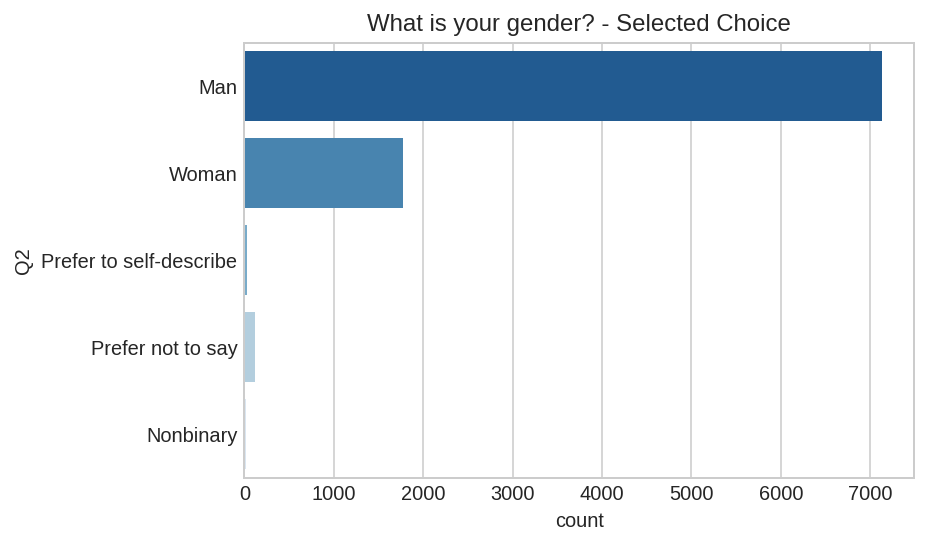

In [12]:
sns.countplot(data=answer,y="Q2",palette="Blues_r").set_title(question["Q2"])#y축을 기준으로 그래프를 그릴 때

##위의 결국 countplot은 data에 원하는 data를 넣고 x or y에 내가 원하는 대상을 넣으면 도수 그래프를 그려주는 함수이다

##그렇다면 Q1~Q6까지 똑같을 테니 자동화 시켜보자

In [13]:
#함수 활용
def show_count_plot(question_number):
  plt.figure(figsize=(10,8))
  sns.countplot(data=answer,y=question_number,palette="Blues_r").set_title(question[question_number])

def show_count_ordered_plot(question_number):
  plt.figure(figsize=(10,8))
  sns.countplot(data=answer,y=question_number,order=answer[question_number].value_counts().index,palette="Blues_r").set_title(question[question_number])

In [14]:
def show_countplot(question_number,order=None):#위의 두 번째 함수를 다르게 변형함 함수
  if not order:
    order=answer[question_number].value_counts().index

  sns.countplot(data=answer,y=question_number,order=order,palette="Blues_r").set_title(question[question_number])

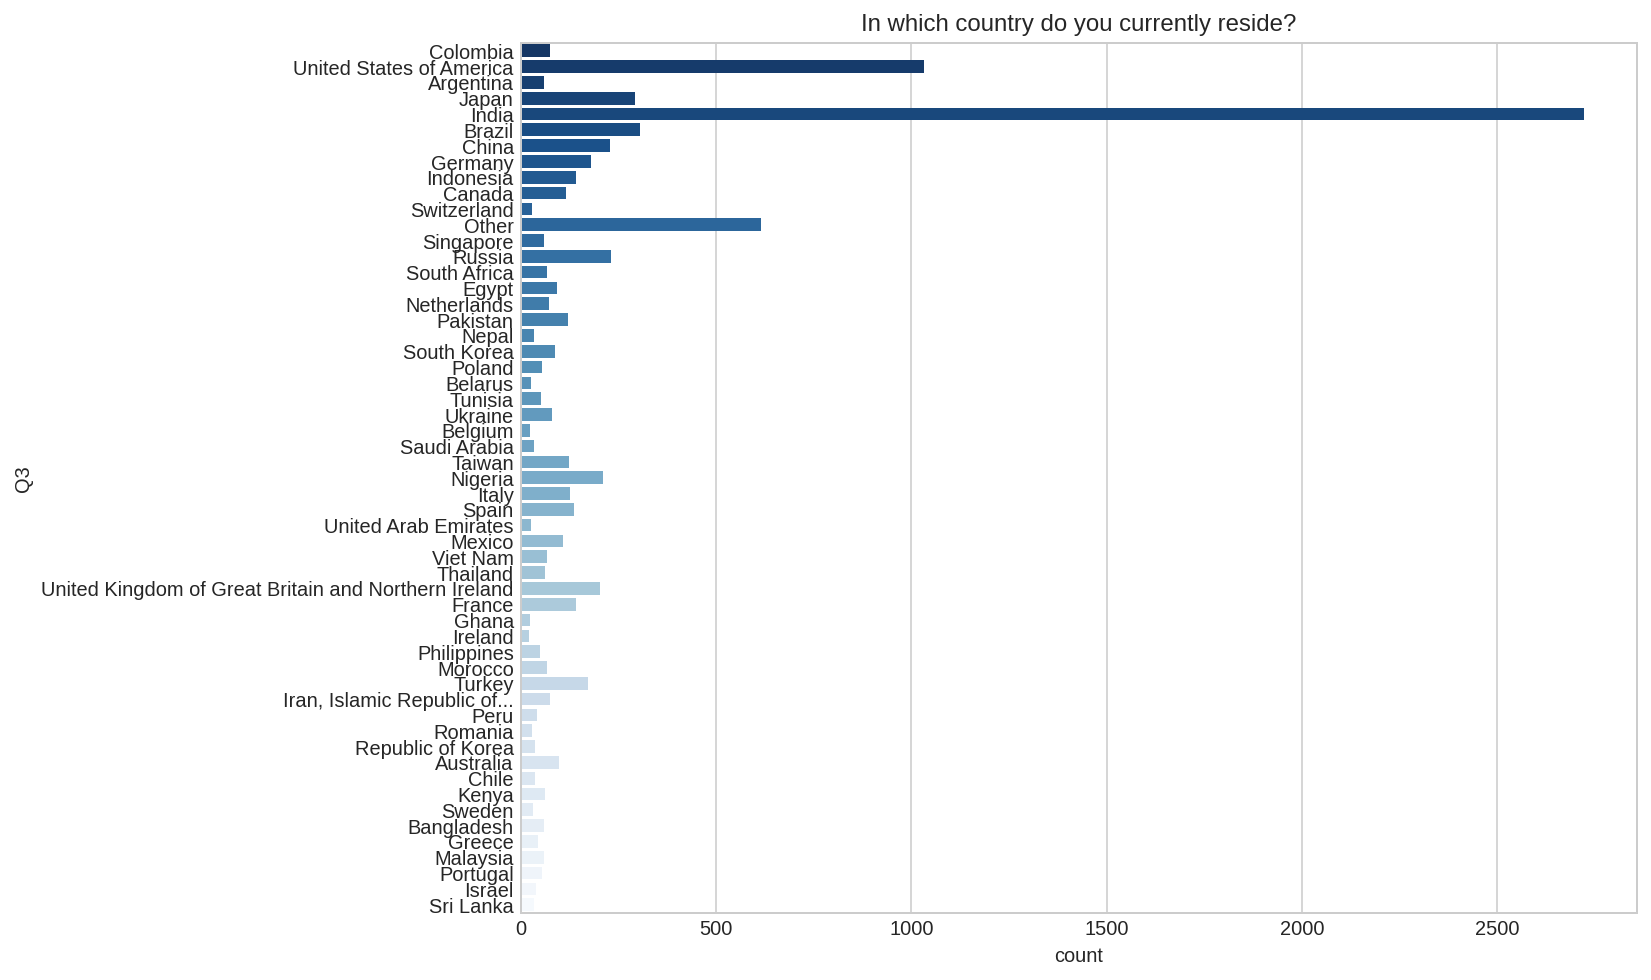

In [15]:
show_count_plot("Q3")

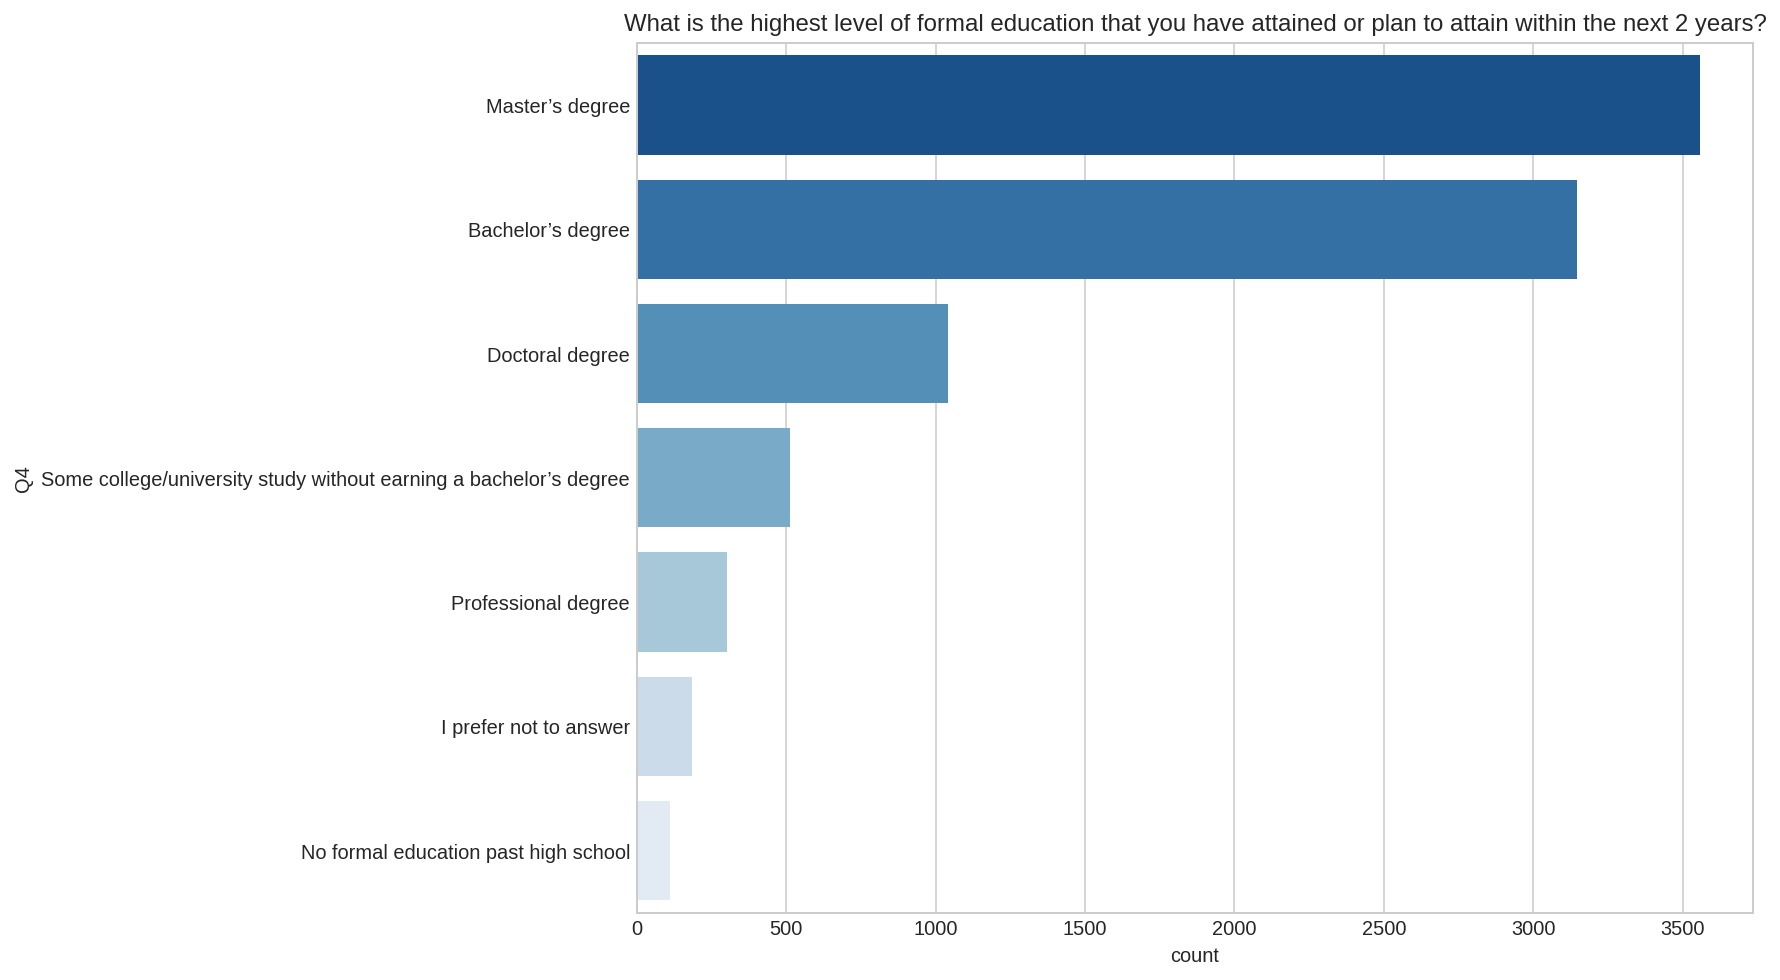

In [16]:
show_count_ordered_plot("Q4")

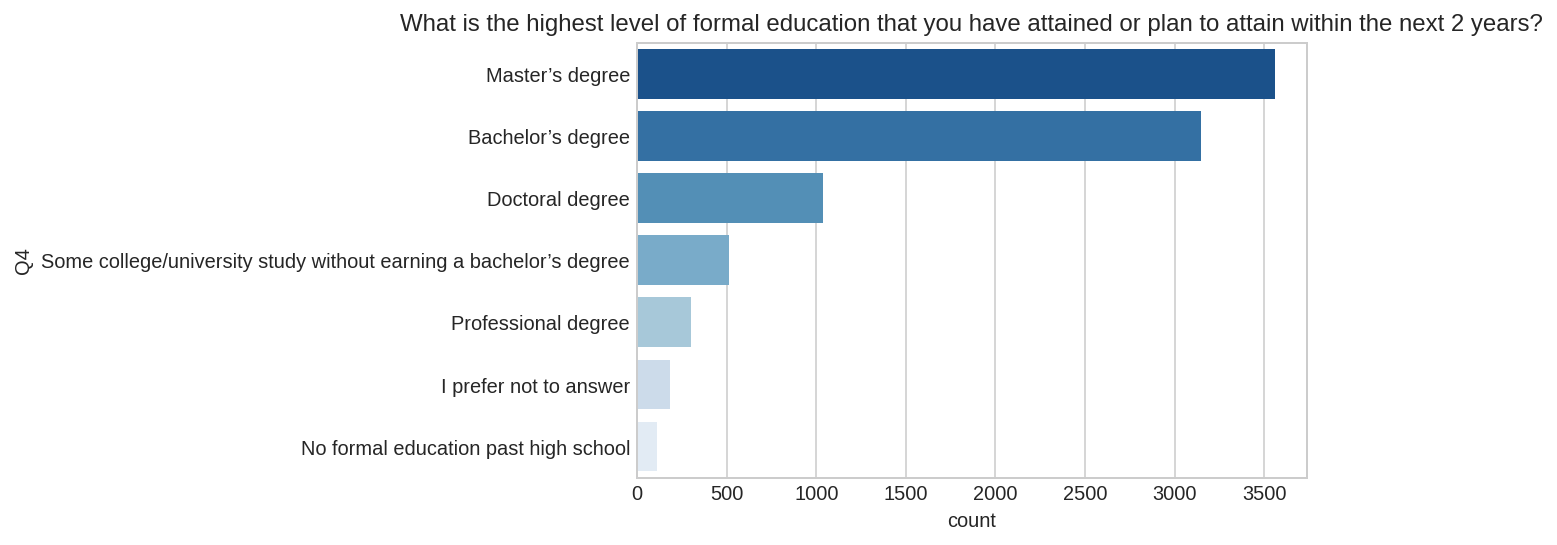

In [17]:
q4_cols=list(answer["Q4"].value_counts().index)#이렇게 order에 list를 넘겨주면 작동함
show_countplot("Q4",q4_cols)

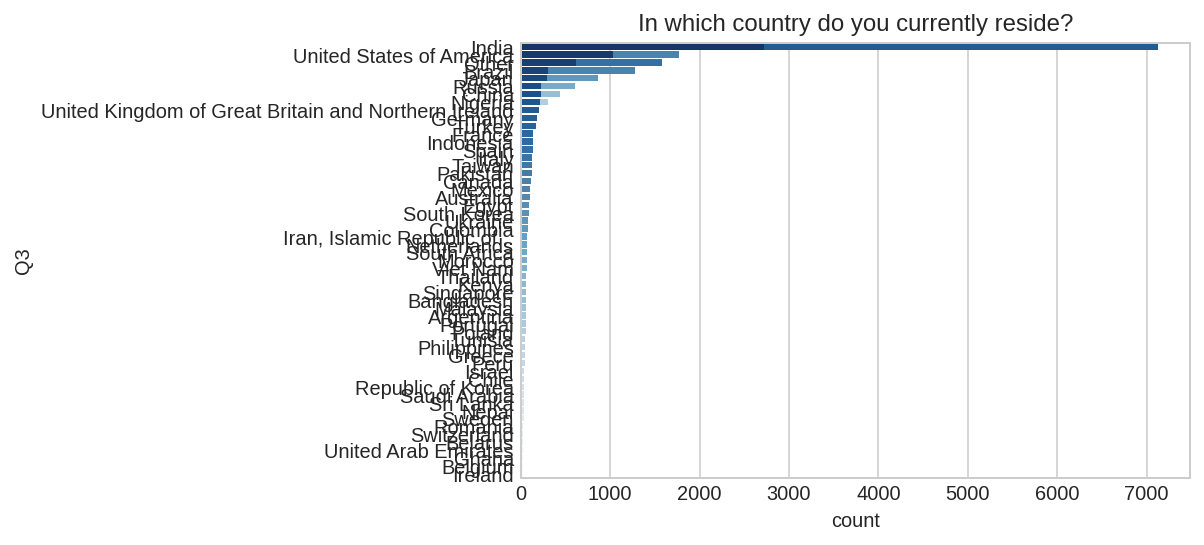

In [18]:
#루프를 활용한 최종적인 자동화
Qno=["Q1","Q2","Q3"]
for i in Qno:
  show_countplot(i)

#데이터 살펴보기 Part2(Q7~)

In [45]:
#str.startswith()=()안의 언어로 시작되는 문자열의 불 값을 반환
answer[answer.columns[pd.Series(answer.columns).str.startswith("Q7")]]
answer[answer.columns[answer.columns.str.startswith("Q7")]]

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
1,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other
2,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
4,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN
5,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9067,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9068,Python,NaN,NaN,NaN,NaN,Java,NaN,NaN,NaN,Bash,NaN,NaN,Other
9069,Python,NaN,SQL,C,C++,Java,Javascript,NaN,Swift,Bash,NaN,NaN,NaN
9070,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other


In [20]:
# list(answer.columns).str.startswith("Q7") #list는 str의 속성을 가지고 있지 않기 때문에 startswith를 쓸수가 없음
pd.Series(answer.columns)#이건 object 즉 str 형식이기 때문에 str의 startswith를 사용 가능 함
pd.Series(answer.columns).str.startswith("Q7")
answer.columns[pd.Series(answer.columns).str.startswith("Q7")]
answer[answer.columns[pd.Series(answer.columns).str.startswith("Q7")]]

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
1,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other
2,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
4,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN
5,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9067,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9068,Python,NaN,NaN,NaN,NaN,Java,NaN,NaN,NaN,Bash,NaN,NaN,Other
9069,Python,NaN,SQL,C,C++,Java,Javascript,NaN,Swift,Bash,NaN,NaN,NaN
9070,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other


In [21]:
#위와 같은 표현 훨씬 쉬움
answer.Q7=answer.filter(regex="Q7")#regex=정규식
answer.Q7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
1,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other
2,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
4,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN
5,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9067,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9068,Python,NaN,NaN,NaN,NaN,Java,NaN,NaN,NaN,Bash,NaN,NaN,Other
9069,Python,NaN,SQL,C,C++,Java,Javascript,NaN,Swift,Bash,NaN,NaN,NaN
9070,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other


In [22]:
Q7=question.filter(regex="Q7")[0].split('-')[0].strip()

In [23]:
answer.Q7
answer.Q7.describe()#요약 통계량

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER
count,7050,1872,3386,1465,1739,1511,1357,127,88,772,1001,83,879
unique,1,1,1,1,1,1,1,1,1,1,1,1,1
top,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,None,Other
freq,7050,1872,3386,1465,1739,1511,1357,127,88,772,1001,83,879


In [24]:
answer_Q7_des=answer.Q7.describe().loc[["top","count"]]
answer_Q7_F=answer_Q7_des.T.set_index("top").sort_values("count",ascending=False)

Text(0.5, 1.0, 'What programming languages do you use on a regular basis? (Select all that apply)')

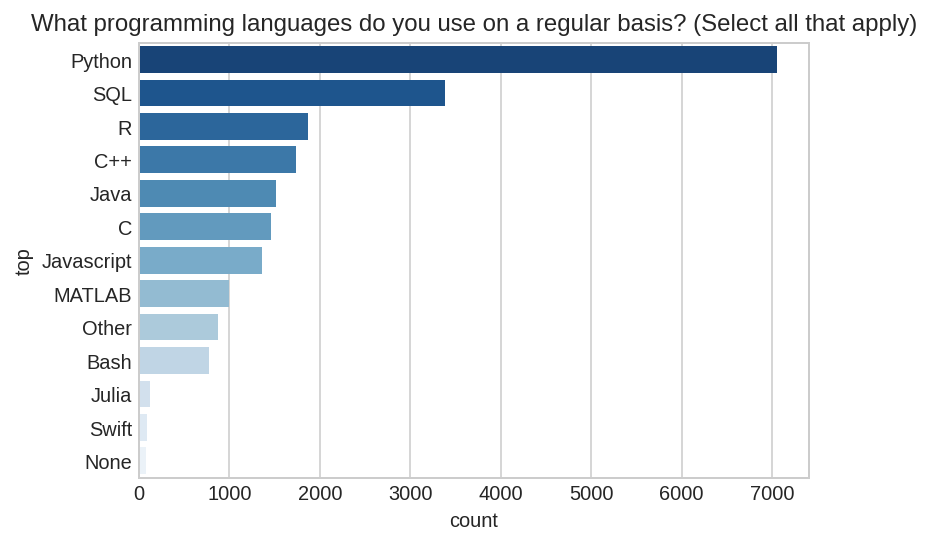

In [25]:
sns.barplot(data=answer_Q7_F,y=answer_Q7_F.index,x="count",palette="Blues_r").set_title(Q7)

#데이터 분석

In [26]:
def show_countplot(question_number,order=None):#위의 두 번째 함수를 다르게 변형함 함수
  if not order:
    order=answer[question_number].value_counts().index

  sns.countplot(data=answer,y=question_number,order=order,palette="Blues_r").set_title(question[question_number])

In [27]:
def show_question_title(question_number):
  try:
    if question_number in question.index:
      return question[question_number]
    else:
      return question.filter(regex=question_number)[0].split('-')[0].strip()
  except:
    print("no number")

In [28]:
show_question_title("7")

'What programming languages do you use on a regular basis? (Select all that apply)'

In [29]:
def show_multiple_answer(question_number):
  answer_df=answer.filter(regex=question_number)
  answer_desc=answer_df.describe()
  answer_cnt=answer_desc.loc[["top","count"]].T
  answer_cnt=answer_cnt.set_index("top")
  answer_cnt=answer_cnt.sort_values("count",ascending=False)
  return answer_cnt

In [30]:
show_multiple_answer("Q11")

,count
top,
A personal computer or laptop,7677


In [31]:
def show_barplot(question_number):
  data_base=show_multiple_answer(question_number)
  sns.barplot(data=data_base,y=data_base.index,x=data_base["count"],palette="Blues_r").set_title(show_question_title(question_number))

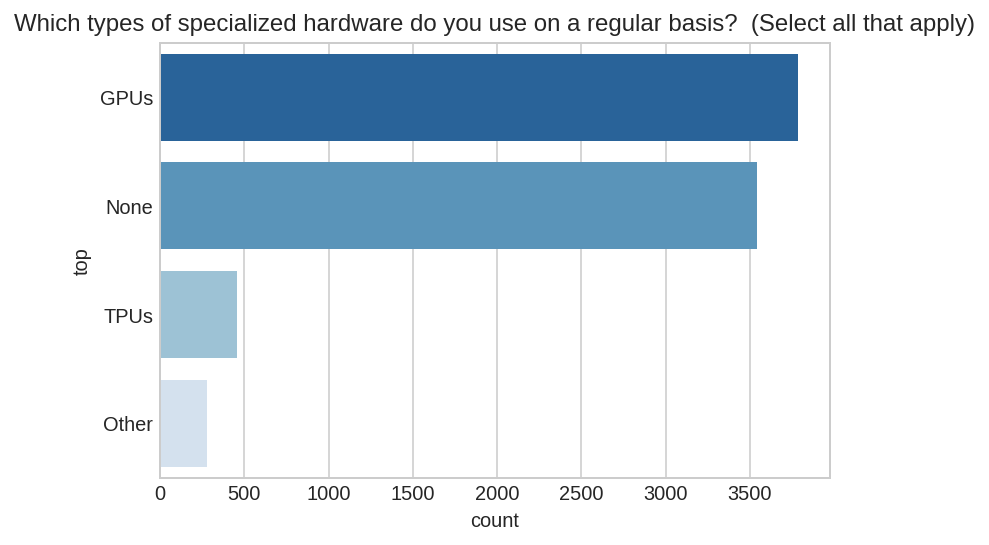

In [32]:
show_barplot("Q12")

In [33]:
def show_plot(question_number):
  if question_number in question.index:
    show_countplot(question_number)
  else:
    show_barplot(question_number)

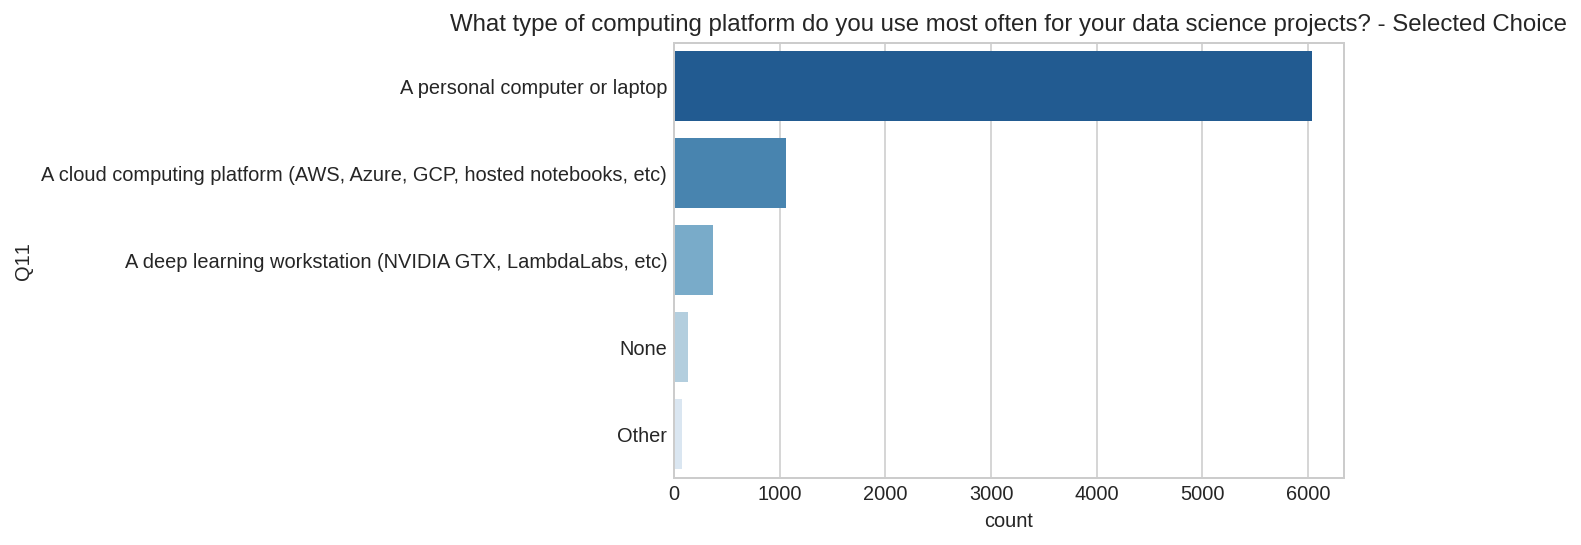

In [34]:
show_plot("Q11")